In [1]:
import numpy as np
from scipy import optimize
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Trainer(object):
    
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))   
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, X, y):
        #Make an internal variable for the callback function:
        self.X = X
        self.y = y

        #Make empty list to store costs:
        self.J = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 1000, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [3]:
class NeuralNetwork(object):
    
    def __init__(self, inputLayerSize, outputLayerSize, hiddenLayerSize):
        # Define Hyperparameters
        self.inputLayerSize = inputLayerSize
        self.outputLayerSize = outputLayerSize
        self.hiddenLayerSize = hiddenLayerSize
        
        # Weights
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        
    def forward(self, x):
        self.z2 = np.dot(x, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat
        
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self, z):
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, x, y):
        self.yHat = self.forward(x)
        J = 0.5 * sum((y - self.yHat)**2)
        return J
    
    def costFunctionPrime(self, x, y):
        
        self.yHat = self.forward(x)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.multiply(np.dot(delta3, self.W2.T), self.sigmoidPrime(self.z2))
        dJdW1 = np.dot(x.T, delta2)
        
        return dJdW1, dJdW2
    
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))
        

In [4]:
class GoDeeper(object):
    
    def __init__(self, inputLayerSize, outputLayerSize, hiddenLayer1Size, hiddenLayer2Size):
        # Define Hyperparameters
        self.inputLayerSize = inputLayerSize
        self.outputLayerSize = outputLayerSize
        self.hiddenLayer1Size = hiddenLayer1Size
        self.hiddenLayer2Size = hiddenLayer2Size
        
        # Weights
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayer1Size)
        self.W2 = np.random.randn(self.hiddenLayer1Size, self.hiddenLayer2Size)
        self.W3 = np.random.randn(self.hiddenLayer2Size, self.outputLayerSize)
        
    def forward(self, x):
        self.z2 = np.dot(x, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        self.a3 = self.sigmoid(self.z3)
        self.z4 = np.dot(self.a3, self.W3)
        yHat = self.sigmoid(self.z4)
        return yHat
        
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self, z):
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, x, y):
        self.yHat = self.forward(x)
        J = 0.5 * sum((y - self.yHat)**2)
        return J
    
    def costFunctionPrime(self, x, y):
        
        self.yHat = self.forward(x)
        
        delta4 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z4))
        dJdW3 = np.dot(self.a3.T, delta4)
        
        delta3 = np.multiply(np.dot(delta4, self.W3.T), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.multiply(np.dot(delta3, self.W2.T), self.sigmoidPrime(self.z2))
        dJdW1 = np.dot(x.T, delta2)
        
        return dJdW1, dJdW2, dJdW3
    
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel(), self.W3.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayer1Size * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayer1Size))
        W2_end = W1_end + self.hiddenLayer1Size*self.hiddenLayer2Size
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayer1Size, self.hiddenLayer2Size))
        W3_end = W2_end + self.hiddenLayer2Size*self.outputLayerSize
        self.W3 = np.reshape(params[W2_end:W3_end], (self.hiddenLayer2Size, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2, dJdW3 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel(), dJdW3.ravel()))

In [5]:
class BetterNet(object):
    
    def __init__(self, inputLayerSize, outputLayerSize, hiddenLayerSize):
        # Define Hyperparameters
        self.inputLayerSize = inputLayerSize
        self.outputLayerSize = outputLayerSize
        self.layerSizes = hiddenLayerSize
        self.layerSizes.insert(0, inputLayerSize)
        self.layerSizes.append(outputLayerSize)
        
        # Weights
        self.W = [0] * (len(self.layerSizes)-1);
        for i in range(0, len(self.W)):
            self.W[i] = np.random.randn(self.layerSizes[i], self.layerSizes[i+1])
        
    def forward(self, x):
        self.z = [0] * len(self.layerSizes)
        self.a = [0] * len(self.layerSizes)
        self.a[0] = x

        for i in range(1, len(self.layerSizes)):
            self.z[i] = np.dot(self.a[i-1], self.W[i-1])
            self.a[i] = self.act(self.z[i])

        yHat = self.a[-1]
        return yHat
        
    def act(self, z):
        return self.sigmoid(z)
    
    def actPrime(self, z):
        return self.sigmoidPrime(z)
        
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self, z):
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def relu(self, z):
        return np.fmax(0, z)
    
    def reluPrime(self, z):
        return np.where(z > 0, 1, 0)
    
    def softRelu(self, z):
        return np.log(1+np.exp(z))
    
    def softReluPrime(self, z):
        return 1/(1+np.exp(-z))
    
    def costFunction(self, x, y):
        self.yHat = self.forward(x)
        J = 0.5 * sum((y - self.yHat)**2)
        return J
    
    def costFunctionPrime(self, x, y):
        
        self.yHat = self.forward(x)

        delta = [0] * len(self.layerSizes)
        delta[-1] = np.multiply(-(y-self.yHat), self.actPrime(self.z[-1]))
        for i in reversed(range(1, len(self.W))):
            delta[i] = np.multiply(np.dot(delta[i+1], self.W[i].T), self.actPrime(self.z[i]))
        
        dJdW = [0] * len(self.W)
        for i in reversed(range(0, len(self.W))):
            dJdW[i] = np.dot(self.a[i].T, delta[i+1])
            
        return tuple(dJdW)
    
    def getParams(self):
        # Get weights unrolled into vector:
        params = np.empty(0)
        for W in self.W:
            params = np.concatenate((params, W.ravel()))
        return params
    
    def setParams(self, params):
        #print params
        # Set weights using single paramater vector.
        start = 0
        end = 0
        for i in range(0, len(self.W)):
            end = end + self.layerSizes[i]*self.layerSizes[i+1]
            self.W[i] = np.reshape(params[start:end], (self.layerSizes[i], self.layerSizes[i+1]))
            start = end
        
    def computeGradients(self, x, y):
        dJdW = self.costFunctionPrime(x, y)
        grad = np.empty(0)
        for dJ in dJdW:
            grad = np.concatenate((grad, dJ.ravel()))
        return grad
        

In [6]:
def generateTrainingSet(n, xMin, xMax, yMax, maxNoise):
      
    x = np.random.randint(xMin, high=xMax+1, size=[n, 2])
    x = np.multiply(x, 1.0)
    
    y = np.empty([n, 1], dtype=float)
    for i in range(0, n):
        # Calculates product +/- maxNoise
        y[i] = [(x[i][0] * x[i][1] + np.random.randint(-maxNoise, high=maxNoise+1))]
        
    return x, y

In [7]:
# Used to make sure gradient calculation works
def computeNumericalGradient(N, X, y):
        paramsInitial = N.getParams()
        numgrad = np.zeros(paramsInitial.shape)
        perturb = np.zeros(paramsInitial.shape)
        e = 1e-4

        for p in range(len(paramsInitial)):
            #Set perturbation vector
            perturb[p] = e
            N.setParams(paramsInitial + perturb)
            loss2 = N.costFunction(X, y)

            N.setParams(paramsInitial - perturb)
            loss1 = N.costFunction(X, y)

            #Compute Numerical Gradient
            numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
            perturb[p] = 0
            
        #Return Params to original value:
        N.setParams(paramsInitial)

        return numgrad 

In [8]:
def train(net, x, y):
    
    # Cost before training
    cost1 = net.costFunction(x, y)
    
    # Begin training. Get smarter!!
    #badTrain(net, x, y)
    smartTrain(net, x, y)
    
    #Cost after training
    cost2 = net.costFunction(x, y)
    
    print "Decreased cost by ", cost1-cost2, ", from ", cost1, " to ", cost2

In [9]:
def badTrain(net, x, y):
    scalar = 3
    for i in range(0, 100):
        dJdW1, dJdW2 = net.costFunctionPrime(x, y)
        net.W1 = net.W1 - scalar*dJdW1
        net.W2 = net.W2 - scalar*dJdW2

In [10]:
def smartTrain(net, x, y):
    T = Trainer(net)
    T.train(x,y)

In [11]:
def printResults(x, yHat, xNorm, yMax):
    for i in range(0, min(10, len(x))):
        print '{:> 10.3f} * {:> 10.3f} = {:> 10.0f} ({:> 10.3f})'.format(\
                                                                     x[i][0]*xNorm[0], \
                                                                     x[i][1]*xNorm[1], \
                                                                     yHat[i][0]*yNorm,\
                                                                     x[i][0]*xNorm[0] * x[i][1]*xNorm[1]\
                                                                    )

In [17]:
# Generate Training Set For Multiplication with Sigmoid

# Training set generation parameters
n = 10
yMax = 1000
maxNoise = 0

xMin = math.ceil(maxNoise**0.5)
xMax = math.floor((yMax-maxNoise)**0.5) 

x, y = generateTrainingSet(n, xMin, xMax, yMax, maxNoise)

xNorm = [xMax, xMax]
yNorm = yMax
x = x/xNorm
y = y/yNorm

In [18]:
# Hyperparameters
inputLayerSize = 2
outputLayerSize = 1
hiddenLayerSize = [3, 3, 2]

#net = NeuralNetwork(inputLayerSize, outputLayerSize, hiddenLayerSize[0]);
#net = GoDeeper(inputLayerSize, outputLayerSize, hiddenLayerSize[0], hiddenLayerSize[1])
net = BetterNet(inputLayerSize, outputLayerSize, hiddenLayerSize)

In [19]:
yHat = net.forward(x)
print "Before training:"
printResults(x, yHat, xNorm, yMax)

Before training:
    22.000 *     13.000 =        460 (   286.000)
     4.000 *     15.000 =        462 (    60.000)
    29.000 *     23.000 =        459 (   667.000)
    17.000 *     18.000 =        460 (   306.000)
     3.000 *     27.000 =        460 (    81.000)
     3.000 *      0.000 =        467 (     0.000)
    19.000 *     10.000 =        461 (   190.000)
    17.000 *     26.000 =        459 (   442.000)
     9.000 *     21.000 =        461 (   189.000)
    31.000 *     30.000 =        458 (   930.000)


In [20]:
train(net, x, y)

Optimization terminated successfully.
         Current function value: 0.106395
         Iterations: 133
         Function evaluations: 145
         Gradient evaluations: 145
Decreased cost by  [ 0.38926473] , from  [ 0.49566022]  to  [ 0.10639549]


In [21]:
yHat = net.forward(x)
print "After training:"
printResults(x, yHat, xNorm, yMax)

After training:
    22.000 *     13.000 =        286 (   286.000)
     4.000 *     15.000 =         60 (    60.000)
    29.000 *     23.000 =        500 (   667.000)
    17.000 *     18.000 =        306 (   306.000)
     3.000 *     27.000 =         81 (    81.000)
     3.000 *      0.000 =          0 (     0.000)
    19.000 *     10.000 =        190 (   190.000)
    17.000 *     26.000 =        442 (   442.000)
     9.000 *     21.000 =        189 (   189.000)
    31.000 *     30.000 =        500 (   930.000)


In [51]:
xTest = np.array(([21, 27], [31, 0], [14, 16], [16, 14], [3, 6]), dtype=float)
xTest = xTest/xNorm
yHatTest = net.forward(xTest)
printResults(xTest, yHatTest, xNorm, yMax)

    21.000 *     27.000 =        500 (   567.000)
    31.000 *      0.000 =          4 (     0.000)
    14.000 *     16.000 =        310 (   224.000)
    16.000 *     14.000 =        255 (   224.000)
     3.000 *      6.000 =          0 (    18.000)


In [52]:
x1 = np.linspace(xMin, xMax, 100)
x2 = np.linspace(xMin, xMax, 100)

x1Norm = x1/xNorm[0]
x2Norm = x2/xNorm[1]

a, b  = np.meshgrid(x1Norm, x2Norm)

allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()

# Contour Plot:
%matplotlib inline
yy = np.dot(x2.reshape(100,1), np.ones((1,100)))
xx = np.dot(x1.reshape(100,1), np.ones((1,100))).T

CS = plt.contour(xx,yy,yNorm*allOutputs.reshape(100, 100))
plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel('x1')
plt.ylabel('x2')

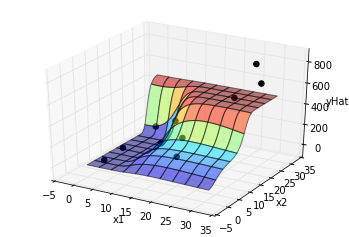

In [55]:
#3D plot:
#Uncomment to plot out-of-notebook (you'll be able to rotate)
#%matplotlib qt

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

#Scatter training examples:
ax.scatter(xNorm[0]*x[:,0], xNorm[1]*x[:,1], yNorm*y, c='k', alpha = 1, s=30)


ax.plot_surface(xx, yy, yNorm*allOutputs.reshape(100, 100), \
                       cmap=plt.cm.jet, alpha = 0.5)


ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('yHat')

# Parameters that work

Perfect weights for ANN
 
## Multiplication Neural Net

Function:  
y = x1 * x2

### Configuration 1

Hyperparameters:  
inputLayerSize = 2  
outputLayerSize = 1  
hiddenLayerSize = 3  
 
Activation function: sigmoid 
 
Training set generation parameters:    
n = 100  
yMax = 1000   
maxNoise = 3  
 
Cost:  0.102647669699
 
Weights:  
array([ -1.38701624e-02,   2.26887306e+02,   2.07337463e+02, -1.48464159e-02,   2.26647525e+02,   2.53320058e+02, -8.49642096e+02,   9.93241265e+01,   3.21016296e+02])  

### Configuration 2

Hyperparameters:  
inputLayerSize = 2  
outputLayerSize = 1  
hiddenLayerSize = 4  
 
Activation function: sigmoid
 
Training set generation parameters:    
n = 100  
yMax = 1000  
maxNoise = 3  

Cost:  0.019336339277

Weights:  
array([   1.01275545,  -56.52080697,    1.08475523,  -12.96642581, -1.37938519, -284.78060384,   -1.37067348,    2.68145405, -260.99911217, -139.95759384,  252.78518696,   -1.25361515])  
        
### Configuration 3

Hyperparameters:  
inputLayerSize = 2  
outputLayerSize = 1  
hiddenLayerSize = [3, 3, 2]  

Activation function: sigmoid

Training set generation parameters:  
n = 100  
yMax = 1000  
maxNoise = 0  

Cost:  0.000132222970768

Weights:  
array([ -6.54536587,  -0.52732609,  -1.09179483,   1.79478202, -0.74794082,   8.20501251,  -0.36178028, -12.75484977, -13.59661701,  -3.25103876, -33.3471684 , -16.55070152, 0.34646804,   3.16438814,  15.20769712, -13.79044737, -3.40176835, -34.14644453, -22.39643493,  26.94347326, -0.14894383,   6.99445105, -34.9698082 ])

In [ ]:
perfectParams = net.getParams()
print "Cost: ", net.costFunction(x, y)[0]
perfectParams

In [22]:
net.setParams([ -6.54536587, -0.52732609, -1.09179483, 1.79478202, -0.74794082, 8.20501251, -0.36178028, -12.75484977, -13.59661701, -3.25103876, -33.3471684 , -16.55070152, 0.34646804, 3.16438814, 15.20769712, -13.79044737, -3.40176835, -34.14644453, -22.39643493, 26.94347326, -0.14894383, 6.99445105, -34.9698082 ])